In [2]:
from utils.chat import OllamaChat
from utils.prompts import get_persona
from company_about_summarizer import summarize_company_about
from utils.example_company.company_about import company_data
from utils.example_company.example_customer import example_customer
from utils.example_company.products_data import Products_data
import json
from langGraph import build_sales_workflow
from langgraph.graph import StateGraph, END
from utils.groq_chat import GroqChat


/home/hamza/Desktop/projects/FYP-main/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Summarizing the Company Data

In [3]:
company_data_summarized=summarize_company_about(company_data)


In [4]:
workflow = build_sales_workflow()

In [5]:
workflow.get_state()

TypeError: Pregel.get_state() missing 1 required positional argument: 'config'

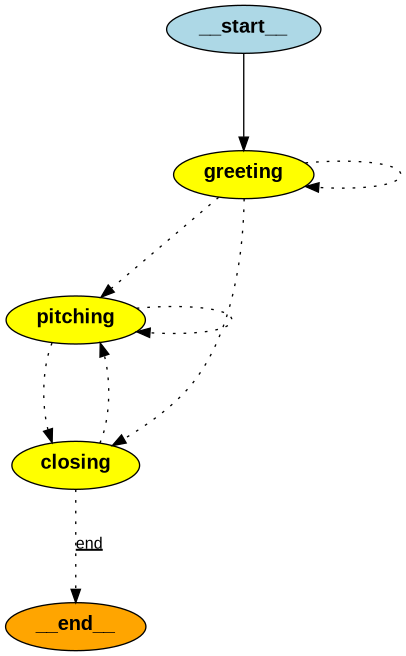

In [10]:
from IPython.display import Image

Image(workflow.get_graph().draw_png())

In [6]:
# Initialize state
state = {
    "messages": [],
    "customer_data": example_customer,
    "current_stage": "greeting",
    "product_info": Products_data["products_and_services"][0],
    "user_prompt": "Hello ?", 
    "interaction_result": None, 
    "company_data": company_data_summarized,
    "next_step": "greeting"

}

In [ ]:
agent_function = workflow.invoke(state)
state = agent_function(state)


In [7]:
events=workflow.stream(state)

In [17]:
for event in events:
    print(event)

AI: Hi again! I'm Alex from TechCare AI. I just wanted to follow up on our conversation earlier today, John. I understand you said you weren't interested in our AI-powered customer service solutions at the time, but I'd like to revisit that discussion if you're open to it.

If you're still facing challenges with managing your customer support tickets, I'd be happy to offer some additional insights or answer any questions you may have. Our solutions have been helping businesses like yours streamline their operations and improve customer satisfaction.

Would you be willing to chat for just a few minutes and see if we can explore how TechCare AI can help address your specific needs?
**************************************************
Customer:  yeah sure
**************************************************

Classification: Is customer ready to hear pitch?
Response: no
**************************************************
{'greeting': {'messages': ["Sales Agent: Hi there, how are you today? My n

In [2]:
chat=GroqChat()

In [15]:
chat.chat("yeah sure")

"It seems like we're off to a casual conversation. Is there anything on your mind you'd like to talk about, or would you like to start a topic?"

In [17]:
chat.system_prompt="haha"

In [8]:
chat.clear_history()

In [ ]:
chat.conversation_history

In [9]:
events

<generator object Pregel.stream at 0x7b170ce627a0>